# Numpy

# Math Operations IO Advanced 

In [2]:
import numpy as np

In [7]:
def iprint(seq, sep='--------'):
    for item in seq:
        print(item)
        print(sep)

## Basic statistics

In [73]:
x = np.array([1 , 2 , 3 , 1 ])
y = np.array([[1 , 2 , 3 ], [5 , 6 , 1 ]])

In [74]:
x.mean()

1.75

In [75]:
np.median(x)

1.5

In [76]:
np.median(y, axis = - 1 ) # last axis

array([ 2.,  5.])

In [77]:
x.std() # full population standard dev.

0.82915619758884995

In [80]:
np.corrcoef(y)

array([[ 1.        , -0.75592895],
       [-0.75592895,  1.        ]])

In [84]:
np.cov(y)

array([[ 1., -2.],
       [-2.,  7.]])

### Polynomials

In [128]:
p = np.poly1d([3 , 2 , - 1 ])
p(0)

-1

In [129]:
p.roots

array([-1.        ,  0.33333333])

In [130]:
print(p.coeffs)
print(p.order)

[ 3  2 -1]
2


In [131]:
x = np.linspace(- 1 , 1 , 2000)
y = np.cos(x) + 0.3 * np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)

In [132]:
p.degree()

90

## IO

#### Byte file

In [76]:
x = np.arange(100).reshape((10,10))

In [77]:
np.save?

In [86]:
np.save('../io/x.npy', x)

In [87]:
y = np.load('../io/x.npy')

In [88]:
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [89]:
np.all(x==y)

True

#### Text file

In [90]:
x = np.arange(100).reshape((10,10))

In [91]:
np.savetxt('../io/x.txt', x)

In [92]:
y = np.loadtxt('../io/x.txt')

In [93]:
np.all(x==y)

True

In [94]:
np.savetxt('../io/array2D.csv', x, fmt='%.6f', delimiter=';')

In [95]:
np.loadtxt('../io/array2D.csv',delimiter=';')

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.],
       [ 30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.],
       [ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.],
       [ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.],
       [ 60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.],
       [ 70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.],
       [ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.],
       [ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.]])

## Advanced Operations

### Vectorize

np.vectorize is just a convenience function. It doesn't actually make code run any faster. If it isn't convenient to use np.vectorize, simply write your own function that works as you wish.

The purpose of np.vectorize is to transform functions which are not numpy-aware (e.g. take floats as input and return floats as output) into functions that can operate on (and return) numpy arrays.

In [96]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b

In [97]:
vfunc = np.vectorize(myfunc)

In [98]:
vfunc([1, 2, 3, 4], 2)

array([3, 4, 1, 2])

In [99]:
a = np.arange(6).reshape(3,2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [100]:
vfunc(a, 2)

array([[2, 3],
       [4, 1],
       [2, 3]])

In [101]:
vfunc(2, [1, 2, 3, 4])

array([1, 4, 5, 6])

In [102]:
vfunc([1, 2, 3, 4], [1, 2, 3, 4])

array([2, 4, 6, 8])

### Apply along axis

In [103]:
np.apply_along_axis?

In [104]:
def my_func(a):
    """Average first and last element of a 1-D array"""
    return (a[0] + a[-1]) * 0.5

In [105]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [106]:
np.apply_along_axis(my_func, axis=0, arr=a)

array([ 4.,  5.,  6.])

In [107]:
np.apply_along_axis(my_func, axis=1, arr=a)

array([ 2.,  5.,  8.])

In [108]:
np.apply_along_axis?

### Apply over axes

In [1]:
np.apply_over_axes?

Object `np.apply_over_axes` not found.


In [110]:
a = np.arange(24).reshape(2,3,4)

In [111]:
a.shape

(2, 3, 4)

In [112]:
b = np.apply_over_axes(np.sum, a, [0,2])
b

array([[[ 60],
        [ 92],
        [124]]])

In [113]:
b.shape

(1, 3, 1)

In [114]:
np.sum(a, axis=(0,2), keepdims=True)

array([[[ 60],
        [ 92],
        [124]]])

## Structured data types

In [115]:
a = np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [116]:
a[0,...]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [117]:
a[:,:,0]

array([[ 0,  4,  8],
       [12, 16, 20]])

In [242]:
samples = np.zeros((6,), dtype= [('sensor_code', 'S4'),
                                 ('position', np.float64), 
                                 ('value', np.float64)])

In [243]:
print(samples.ndim)
print(samples.shape)
print(samples.dtype.names)

1
(6,)
('sensor_code', 'position', 'value')


In [244]:
samples[:] = [('ALFA', 1, 0.37), 
              ('BETA', 1, 0.11),
              ('TAU', 1, 0.13),
              ('ALFA', 1.5, 0.37),
              ('ALFA', 3, 0.11),
              ('TAU', 1.2, 0.13)]

In [245]:
samples

array([(b'ALFA',  1. ,  0.37), (b'BETA',  1. ,  0.11),
       (b'TAU',  1. ,  0.13), (b'ALFA',  1.5,  0.37),
       (b'ALFA',  3. ,  0.11), (b'TAU',  1.2,  0.13)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

In [246]:
samples['sensor_code']

array([b'ALFA', b'BETA', b'TAU', b'ALFA', b'ALFA', b'TAU'],
      dtype='|S4')

In [247]:
samples['value']

array([ 0.37,  0.11,  0.13,  0.37,  0.11,  0.13])

In [248]:
samples[0]

(b'ALFA',  1.,  0.37)

## Masked arrays

In [126]:
x = np.ma.array([1 , 2 , 3 , 4 ], mask= [ 0 , 1 , 0 , 1 ])
x

masked_array(data = [1 -- 3 --],
             mask = [False  True False  True],
       fill_value = 999999)

In [127]:
np.ma.sqrt([ 1 , - 1 , 2 , - 2 ])

masked_array(data = [1.0 -- 1.4142135623730951 --],
             mask = [False  True False  True],
       fill_value = 1e+20)

### Exercises

#### Mesh and vectorize

In [249]:
def transmissibility(zeta, r): 
    t = abs((1 + 1j * 2 * zeta * r) / (1 - r ** 2 + 1j * 2 * zeta * r))
    return t

In [250]:
frequency = np.arange(1,6)

In [251]:
ratioMesh = np.outer(frequency, 1.0 / frequency)
ratioMesh

array([[ 1.        ,  0.5       ,  0.33333333,  0.25      ,  0.2       ],
       [ 2.        ,  1.        ,  0.66666667,  0.5       ,  0.4       ],
       [ 3.        ,  1.5       ,  1.        ,  0.75      ,  0.6       ],
       [ 4.        ,  2.        ,  1.33333333,  1.        ,  0.8       ],
       [ 5.        ,  2.5       ,  1.66666667,  1.25      ,  1.        ]])

In [252]:
zeta = 0.05

In [253]:
transmissibility(zeta, 0.05)

1.002506202773349

In [254]:
TR = lambda r: transmissibility(0.05, r)

In [255]:
transmissibility_vec = np.vectorize(TR)

In [256]:
transmissibility_vec(ratioMesh)

array([[ 10.04987562,   1.33204215,   1.12483421,   1.06662077,
          1.04164895],
       [  0.33918173,  10.04987562,   1.79114541,   1.33204215,
          1.19007966],
       [  0.13041217,   0.80318766,  10.04987562,   2.25917813,
          1.55847618],
       [  0.07177668,   0.33918173,   1.27844324,  10.04987562,   2.7202941 ],
       [  0.04657464,   0.19611614,   0.56776937,   1.74894926,
         10.04987562]])

#### Simple dataset operations

In [206]:
data = np.loadtxt('../io/populations_tab.txt', dtype=np.uint32)
year, hares, lynxes, carrots = data.T # trick: columns to variables

In [207]:
data

array([[ 1900, 30000,  4000, 48300],
       [ 1901, 47200,  6100, 48200],
       [ 1902, 70200,  9800, 41500],
       [ 1903, 77400, 35200, 38200],
       [ 1904, 36300, 59400, 40600],
       [ 1905, 20600, 41700, 39800],
       [ 1906, 18100, 19000, 38600],
       [ 1907, 21400, 13000, 42300],
       [ 1908, 22000,  8300, 44500],
       [ 1909, 25400,  9100, 42100],
       [ 1910, 27100,  7400, 46000],
       [ 1911, 40300,  8000, 46800],
       [ 1912, 57000, 12300, 43800],
       [ 1913, 76600, 19500, 40900],
       [ 1914, 52300, 45700, 39400],
       [ 1915, 19500, 51100, 39000],
       [ 1916, 11200, 29700, 36700],
       [ 1917,  7600, 15800, 41800],
       [ 1918, 14600,  9700, 43300],
       [ 1919, 16200, 10100, 41300],
       [ 1920, 24700,  8600, 47300]], dtype=uint32)

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt

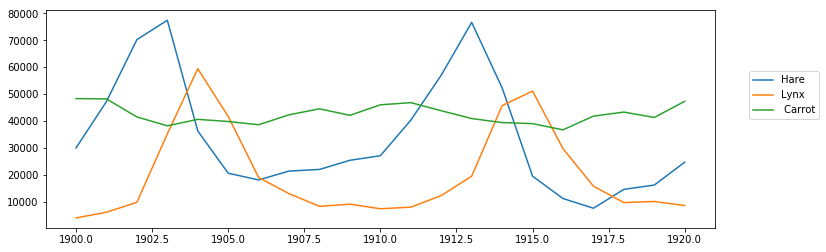

In [212]:
plt.figure(figsize=(12,4))
plt.plot(year, hares)
plt.plot(year, lynxes)
plt.plot(year, carrots)
plt.legend(('Hare ', 'Lynx' , ' Carrot'), loc = ( 1.05, 0.5))

In [148]:
populations = data[:, 1 :]
populations.mean(axis=0)

array([ 34080.95238095,  20166.66666667,  42400.        ])

In [149]:
populations.std(axis=0)

array([ 20897.90645809,  16254.59153691,   3322.50622558])

In [150]:
np.argmax(populations, axis=1)

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2])

#### Distance

In [195]:
ref = np.array([1,1,1])

In [196]:
points = np.random.rand(30).reshape((10,3))

In [198]:
points

array([[ 0.60737451,  0.21547734,  0.30798162],
       [ 0.87785017,  0.96259379,  0.28001907],
       [ 0.01638916,  0.13632869,  0.43897621],
       [ 0.80709468,  0.40415847,  0.85839818],
       [ 0.29211993,  0.83261085,  0.31952477],
       [ 0.58034881,  0.53255753,  0.10651388],
       [ 0.45961857,  0.02168106,  0.04406683],
       [ 0.08016897,  0.00516291,  0.48545859],
       [ 0.73193285,  0.6354994 ,  0.24913463],
       [ 0.33905305,  0.543822  ,  0.17742348]])

In [200]:
distances = np.linalg.norm(points-ref,axis=1)

In [201]:
inds = np.argsort(distances)

In [202]:
inds

array([3, 1, 8, 4, 5, 0, 9, 2, 7, 6])

In [203]:
points[inds]

array([[ 0.80709468,  0.40415847,  0.85839818],
       [ 0.87785017,  0.96259379,  0.28001907],
       [ 0.73193285,  0.6354994 ,  0.24913463],
       [ 0.29211993,  0.83261085,  0.31952477],
       [ 0.58034881,  0.53255753,  0.10651388],
       [ 0.60737451,  0.21547734,  0.30798162],
       [ 0.33905305,  0.543822  ,  0.17742348],
       [ 0.01638916,  0.13632869,  0.43897621],
       [ 0.08016897,  0.00516291,  0.48545859],
       [ 0.45961857,  0.02168106,  0.04406683]])